In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import statsmodels.api as sm
from statsmodels.formula.api import logit, glm,ols
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, Normalizer
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.pipeline import Pipeline
from sklearn.pipeline import make_pipeline
from sklearn.feature_selection import chi2
from sklearn.ensemble import StackingClassifier
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, accuracy_score, roc_curve, classification_report


In [3]:
heart = pd.read_csv("heart.csv")

In [4]:
heart = heart.drop(['thalach','slope'], axis=1)

In [5]:
# Seperate the predictor and response variable

x = heart.drop(['target'], axis=1)
y = heart['target']

In [6]:
# split the data with test = 30%, train = 70%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size= 0.3)

In [7]:
# implementing the decision tree

model = DecisionTreeClassifier(criterion='entropy')

fit_model = model.fit(X_train,y_train)
pred_model = fit_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print("confusion matrix")
print(df_conf_matrix)
print('\n')
print("Accuracy of Decision Tree:", df_acc_scores*100,'\n')
print(classification_report(y_test, pred_model))

confusion matrix
[[150   3]
 [  4 151]]


Accuracy of Decision Tree: 97.72727272727273 

              precision    recall  f1-score   support

           0       0.97      0.98      0.98       153
           1       0.98      0.97      0.98       155

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308



In [8]:
model = LogisticRegression(max_iter = 1000)

fit_model = model.fit(X_train, y_train)
pred_model = fit_model.predict(X_test)
df_acc_scores =accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print ('confusion matrix')
print(df_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression: ", df_acc_scores*100, '\n')
print(classification_report(y_test,pred_model))

confusion matrix
[[128  25]
 [ 28 127]]


Accuracy of Logistic Regression:  82.79220779220779 

              precision    recall  f1-score   support

           0       0.82      0.84      0.83       153
           1       0.84      0.82      0.83       155

    accuracy                           0.83       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308



In [9]:
model = KNeighborsClassifier()

fit_model = model.fit(X_train, y_train)
pred_model = fit_model.predict(X_test)
df_acc_scores =accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print ('confusion matrix')
print(df_conf_matrix)
print('\n')
print("Accuracy of KNN: ", df_acc_scores*100, '\n')
print(classification_report(y_test,pred_model))

confusion matrix
[[106  47]
 [ 50 105]]


Accuracy of KNN:  68.5064935064935 

              precision    recall  f1-score   support

           0       0.68      0.69      0.69       153
           1       0.69      0.68      0.68       155

    accuracy                           0.69       308
   macro avg       0.69      0.69      0.69       308
weighted avg       0.69      0.69      0.69       308



In [10]:
model = GaussianNB()

fit_model = model.fit(X_train, y_train)
pred_model = fit_model.predict(X_test)
df_acc_scores =accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print ('confusion matrix')
print(df_conf_matrix)
print('\n')
print("Accuracy of Naive Bayes : ", df_acc_scores*100, '\n')
print(classification_report(y_test,pred_model))

confusion matrix
[[127  26]
 [ 29 126]]


Accuracy of Naive Bayes :  82.14285714285714 

              precision    recall  f1-score   support

           0       0.81      0.83      0.82       153
           1       0.83      0.81      0.82       155

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308



In [11]:
heart['age'] = pd.qcut(heart['age'], q=4)
heart['trestbps'] = pd.qcut(heart['trestbps'], q=4)
heart['chol'] = pd.qcut(heart['chol'], q=4)
heart['oldpeak'] = pd.qcut(heart['oldpeak'], q=2)

In [12]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

encoded_age = le.fit_transform(heart['age'])
heart['age'] = encoded_age

encoded_trest = le.fit_transform(heart['trestbps'])
heart['trestbps'] = encoded_trest

encoded_chol = le.fit_transform(heart['chol'])
heart['chol'] = encoded_chol

encoded_old = le.fit_transform(heart['oldpeak'])
heart['oldpeak'] = encoded_old

In [13]:
x = heart.drop(['target'], axis=1)
y = heart['target']

#split the data with test = 30%, train = 70%
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [14]:
model  = LogisticRegression(max_iter =1000)

param_grid = {'C': np.logspace(-4,4,20)}

search = GridSearchCV(model, param_grid, scoring ='accuracy', cv=10, refit = True)
fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print('confussion matrix')
print(df_conf_matrix)
print('\n')
print("Accuracy of logistic Regression: ", df_acc_scores* 100, '\n')
print(classification_report(y_test, pred_model))
print('best params: ', fit_model.best_params_)

confussion matrix
[[112  35]
 [ 18 143]]


Accuracy of logistic Regression:  82.79220779220779 

              precision    recall  f1-score   support

           0       0.86      0.76      0.81       147
           1       0.80      0.89      0.84       161

    accuracy                           0.83       308
   macro avg       0.83      0.83      0.83       308
weighted avg       0.83      0.83      0.83       308

best params:  {'C': 0.08858667904100823}


In [16]:
model = DecisionTreeClassifier(criterion = 'entropy')

max_depth = range (1,11,2)
param_grid = dict(max_depth = max_depth)
search = GridSearchCV(model, param_grid, scoring='accuracy', cv = 10, refit = True )
fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print('confusion matrix')
print(df_conf_matrix)
print('\n')
print("Accuracy of Decision Tree Classifier: ", df_acc_scores* 100, '\n')
print(classification_report(y_test, pred_model))
print('best max depth: ', fit_model.best_params_)

confussion matrix
[[141   6]
 [  0 161]]


Accuracy of Decision Tree Classifier:  98.05194805194806 

              precision    recall  f1-score   support

           0       1.00      0.96      0.98       147
           1       0.96      1.00      0.98       161

    accuracy                           0.98       308
   macro avg       0.98      0.98      0.98       308
weighted avg       0.98      0.98      0.98       308

best max depth:  {'max_depth': 9}


In [17]:
model = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors = k_range)

search = GridSearchCV(model, param_grid, cv=10, scoring='accuracy', refit=True)

fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print('confusion matrix')
print(df_conf_matrix)
print('\n')
print("Accuracy of KNN Classifier: ", df_acc_scores* 100, '\n')
print(classification_report(y_test, pred_model))
print('best K neighbors: ', fit_model.best_params_)

confusion matrix
[[147   0]
 [  0 161]]


Accuracy of KNN Classifier:  100.0 

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       147
           1       1.00      1.00      1.00       161

    accuracy                           1.00       308
   macro avg       1.00      1.00      1.00       308
weighted avg       1.00      1.00      1.00       308

best K neighbors:  {'n_neighbors': 1}


In [18]:
model = GaussianNB()

param_grid = {'var_smoothing':np.logspace(0,-9,num=100)}

search = GridSearchCV(model,param_grid, cv=10, scoring='accuracy', refit=True)

fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print('confusion matrix')
print(df_conf_matrix)
print('\n')
print("Accuracy of Naive Bayes: ", df_acc_scores* 100, '\n')
print(classification_report(y_test, pred_model))
print('best params: ', fit_model.best_params_)

confusion matrix
[[112  35]
 [ 20 141]]


Accuracy of Naive Bayes:  82.14285714285714 

              precision    recall  f1-score   support

           0       0.85      0.76      0.80       147
           1       0.80      0.88      0.84       161

    accuracy                           0.82       308
   macro avg       0.82      0.82      0.82       308
weighted avg       0.82      0.82      0.82       308

best params:  {'var_smoothing': 0.0533669923120631}


In [19]:
pipe = make_pipeline(SelectKBest(score_func = chi2), LogisticRegression(max_iter=1000))
params = {'selectkbest__k':[1,2,3,4,5,6]}

search = GridSearchCV(pipe, params, cv=10, scoring='accuracy', refit = True)

fit_model = search.fit(X_train, y_train)

In [21]:
fit_model.best_params_

{'selectkbest__k': 3}

In [22]:
pipe = make_pipeline(SelectKBest(score_func = chi2), DecisionTreeClassifier(criterion='entropy'))
params = {'selectkbest__k':[1,2,3,4,5,6]}

search = GridSearchCV(pipe, params, cv=10, scoring='accuracy', refit = True)

fit_model = search.fit(X_train, y_train)

fit_model.best_params_

{'selectkbest__k': 6}

In [23]:
pipe = make_pipeline(SelectKBest(score_func = chi2), KNeighborsClassifier())
params = {'selectkbest__k':[1,2,3,4,5,6]}

search = GridSearchCV(pipe, params, cv=10, scoring='accuracy', refit = True)

fit_model = search.fit(X_train, y_train)

fit_model.best_params_

{'selectkbest__k': 6}

In [24]:
pipe = make_pipeline(SelectKBest(score_func = chi2), GaussianNB())
params = {'selectkbest__k':[1,2,3,4,5,6]}

search = GridSearchCV(pipe, params, cv=10, scoring='accuracy', refit = True)

fit_model = search.fit(X_train, y_train)

fit_model.best_params_

{'selectkbest__k': 5}

In [25]:
best_features = SelectKBest(score_func = chi2, k=6)
fit = best_features.fit(X_train, y_train)

filter = best_features.get_support()
cols = X_train.columns
col = cols[filter]
score = fit.scores_[filter]

In [27]:
dictt = {}
for i in range(len(col)):
    dictt[col[i]] = score[i]
    
pdd = pd.DataFrame()
pdd['Attributes'] = dictt.keys()
pdd['Chi2 Scores'] = dictt.values()

pdd_sort = pdd.sort_values(by=['Chi2 Scores'], ascending = False)

pdp = pdd_sort.set_index('Attributes')
chi_scores = pdp.reset_index()
chi_scores

,Attributes,Chi2 Scores
0,cp,152.872775
1,ca,122.511926
2,exang,99.188691
3,oldpeak,74.737225
4,age,39.448326
5,chol,19.546606


In [28]:
x = heart[['ca', 'cp', 'exang', 'oldpeak', 'age', 'sex']]
y = heart['target']

X_train, X_test, y_train, y_test = train_test_split(x, y, test_size = 0.3)

In [29]:
model = LogisticRegression(max_iter = 1000)

param_grid = {'C': np.logspace(-4, 4, 20)}

search = GridSearchCV(model,param_grid, cv=10, scoring='accuracy', refit=True)

fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print('confusion matrix')
print(df_conf_matrix)
print('\n')
print("Accuracy of Logistic Regression: ", df_acc_scores* 100, '\n')
print(classification_report(y_test, pred_model))
print('best params: ', fit_model.best_params_)

confusion matrix
[[119  34]
 [ 33 122]]


Accuracy of Logistic Regression:  78.24675324675324 

              precision    recall  f1-score   support

           0       0.78      0.78      0.78       153
           1       0.78      0.79      0.78       155

    accuracy                           0.78       308
   macro avg       0.78      0.78      0.78       308
weighted avg       0.78      0.78      0.78       308

best params:  {'C': 1.623776739188721}


In [30]:
model = DecisionTreeClassifier(criterion = 'entropy')
max_depth = range(1, 11, 2)

param_grid = dict(max_depth=max_depth)

search = GridSearchCV(model,param_grid, cv=10, scoring='accuracy', refit=True)

fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print('confusion matrix')
print(df_conf_matrix)
print('\n')
print("Accuracy of Decision Tree Classifier: ", df_acc_scores* 100, '\n')
print(classification_report(y_test, pred_model))
print('best max depth: ', fit_model.best_params_)

confusion matrix
[[135  18]
 [ 27 128]]


Accuracy of Decision Tree Classifier:  85.3896103896104 

              precision    recall  f1-score   support

           0       0.83      0.88      0.86       153
           1       0.88      0.83      0.85       155

    accuracy                           0.85       308
   macro avg       0.86      0.85      0.85       308
weighted avg       0.86      0.85      0.85       308

best max depth:  {'max_depth': 9}


In [31]:
model = KNeighborsClassifier()

k_range = list(range(1, 31))
param_grid = dict(n_neighbors=k_range)

search = GridSearchCV(model,param_grid, cv=10, scoring='accuracy', refit=True)

fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print('confusion matrix')
print(df_conf_matrix)
print('\n')
print("Accuracy of KNN Classifier: ", df_acc_scores* 100, '\n')
print(classification_report(y_test, pred_model))
print('best K neighbors: ', fit_model.best_params_)

confusion matrix
[[133  20]
 [ 17 138]]


Accuracy of KNN Classifier:  87.98701298701299 

              precision    recall  f1-score   support

           0       0.89      0.87      0.88       153
           1       0.87      0.89      0.88       155

    accuracy                           0.88       308
   macro avg       0.88      0.88      0.88       308
weighted avg       0.88      0.88      0.88       308

best K neighbors:  {'n_neighbors': 1}


In [32]:
model = GaussianNB()

param_grid = {'var_smoothing':np.logspace(0,-9,num=100)}

search = GridSearchCV(model,param_grid, cv=10, scoring='accuracy', refit=True)

fit_model = search.fit(X_train, y_train)
best_model = fit_model.best_estimator_
pred_model = best_model.predict(X_test)
df_acc_scores = accuracy_score(y_test, pred_model)
df_conf_matrix = confusion_matrix(y_test, pred_model)
print('confusion matrix')
print(df_conf_matrix)
print('\n')
print("Accuracy of Naive Bayes: ", df_acc_scores* 100, '\n')
print(classification_report(y_test, pred_model))
print('best params: ', fit_model.best_params_)

confusion matrix
[[116  37]
 [ 33 122]]


Accuracy of Naive Bayes:  77.27272727272727 

              precision    recall  f1-score   support

           0       0.78      0.76      0.77       153
           1       0.77      0.79      0.78       155

    accuracy                           0.77       308
   macro avg       0.77      0.77      0.77       308
weighted avg       0.77      0.77      0.77       308

best params:  {'var_smoothing': 0.04328761281083057}


In [33]:
con_matrix_pred = np.array([[140,13],[3,152]])
con_matrix_pred

array([[140,  13],
       [  3, 152]])

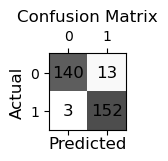

In [37]:
plt.style.use('default')
fig,ax = plt.subplots(figsize=(1,1))
ax.matshow(con_matrix_pred, cmap=plt.cm.Greys, alpha= 0.7)
for i in range (con_matrix_pred.shape[0]):
    for j in range(con_matrix_pred.shape[1]):
        ax.text(x = j, y=i, s= con_matrix_pred[i,j], va='center',ha='center', size='large')
plt.xlabel ('Predicted', fontsize = 12)
plt.ylabel ('Actual', fontsize = 12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()